In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [14]:
df_games = pd.read_parquet('../Datasets/steam_games_preprocessed.parquet')

In [15]:
df_reviews = pd.read_parquet('../Datasets/user_reviews_preprocessed.parquet')

In [16]:
df_items = pd.read_parquet('../Datasets/users_items_preprocessed.parquet')

In [17]:
df_games.head()

,item_id,title,developer,release_date,genres,tags,price
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,"Action, Casual, Indie, Simulation, Strategy","Strategy, Action, Indie, Casual, Simulation",4.99
1,643980,Ironbound,Secret Level SRL,2018-01-04,"Free to Play, Indie, RPG, Strategy","Free to Play, Strategy, Indie, RPG, Card Game,...",0.00
2,670290,Real Pool 3D - Poolians,Poolians.com,2017-07-24,"Casual, Free to Play, Indie, Simulation, Sports","Free to Play, Simulation, Sports, Casual, Indi...",0.00
3,767400,弹炸人2222,彼岸领域,2017-12-07,"Action, Adventure, Casual","Action, Adventure, Casual",0.99
4,772540,Battle Royale Trainer,Trickjump Games Ltd,2018-01-04,"Action, Adventure, Simulation","Action, Adventure, Simulation, FPS, Shooter, T...",3.99


In [18]:
df_reviews.head()

,item_id,recommend,user_id,sentiment_analysis
0,1250,True,76561197970982479,2
1,22200,True,76561197970982479,2
2,43110,True,76561197970982479,2
3,251610,True,js41637,2
4,227300,True,js41637,0


In [19]:
df_items.head()

,item_name,playtime_forever,user_id,items_count
0,Counter-Strike,6,76561197970982479,277
1,Team Fortress Classic,0,76561197970982479,277
2,Day of Defeat,7,76561197970982479,277
3,Deathmatch Classic,0,76561197970982479,277
4,Half-Life: Opposing Force,0,76561197970982479,277


In [20]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27410 entries, 0 to 27409
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   item_id       27410 non-null  object        
 1   title         27410 non-null  object        
 2   developer     27410 non-null  object        
 3   release_date  27410 non-null  datetime64[ns]
 4   genres        27410 non-null  object        
 5   tags          27410 non-null  object        
 6   price         27410 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.5+ MB


In [10]:
df_games.describe()

,release_date,price
count,27410,27410.000000
mean,2015-06-02 07:56:45.618387456,8.996382
min,1983-06-19 00:00:00,0.000000
25%,2014-11-04 00:00:00,2.990000
50%,2016-05-10 00:00:00,4.990000
75%,2017-04-25 00:00:00,9.990000
max,2021-12-31 00:00:00,995.000000
std,NaN,15.974828


### Distribución de precios

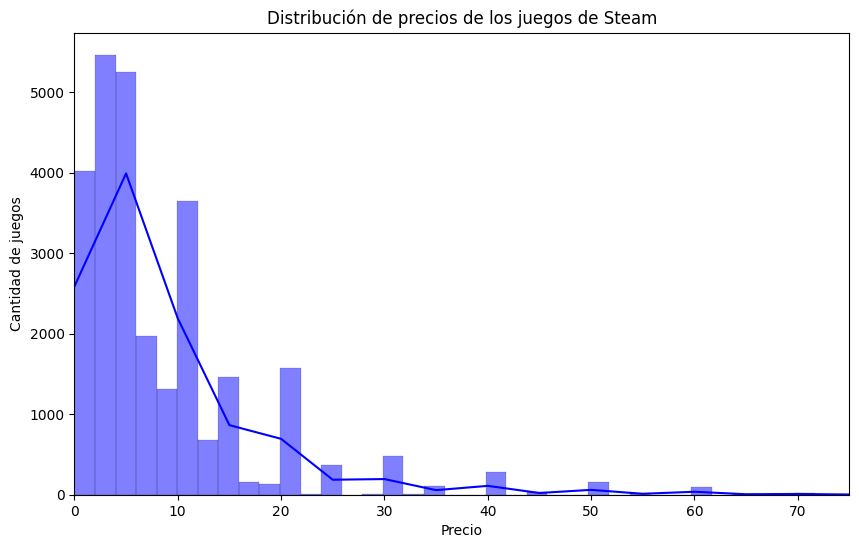

In [29]:
# Análisis de precios
plt.figure(figsize=(10,6))
sns.histplot(df_games['price'], bins=500, kde=True, color='blue')
plt.title('Distribución de precios de los juegos de Steam')
plt.xlim(0,75)
plt.xlabel('Precio')
plt.ylabel('Cantidad de juegos')
plt.show()

### Cantidad de juegos por desarrollador

C:\Users\santo\AppData\Local\Temp\ipykernel_11532\579776659.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_developers.index, y=top_developers.values, palette='viridis')


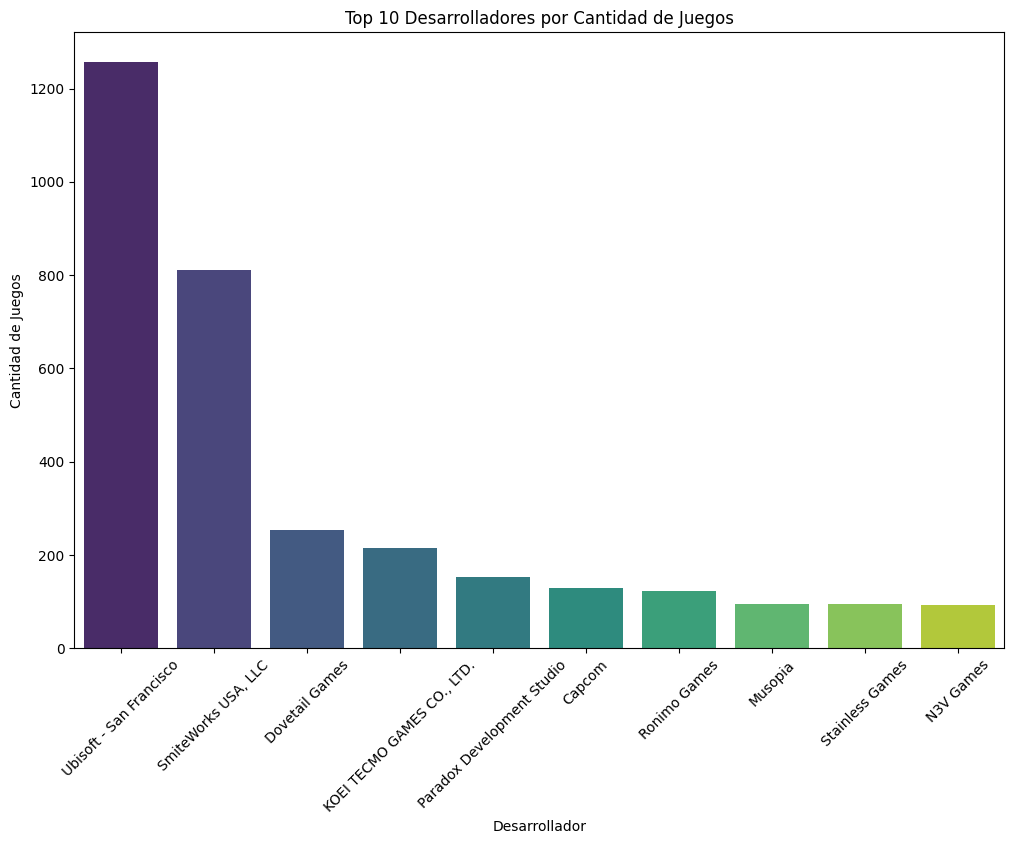

In [30]:
plt.figure(figsize=(12, 8))
top_developers = df_games['developer'].value_counts().head(10)
sns.barplot(x=top_developers.index, y=top_developers.values, palette='viridis')
plt.title('Top 10 Desarrolladores por Cantidad de Juegos')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

### Top 10 de géneros

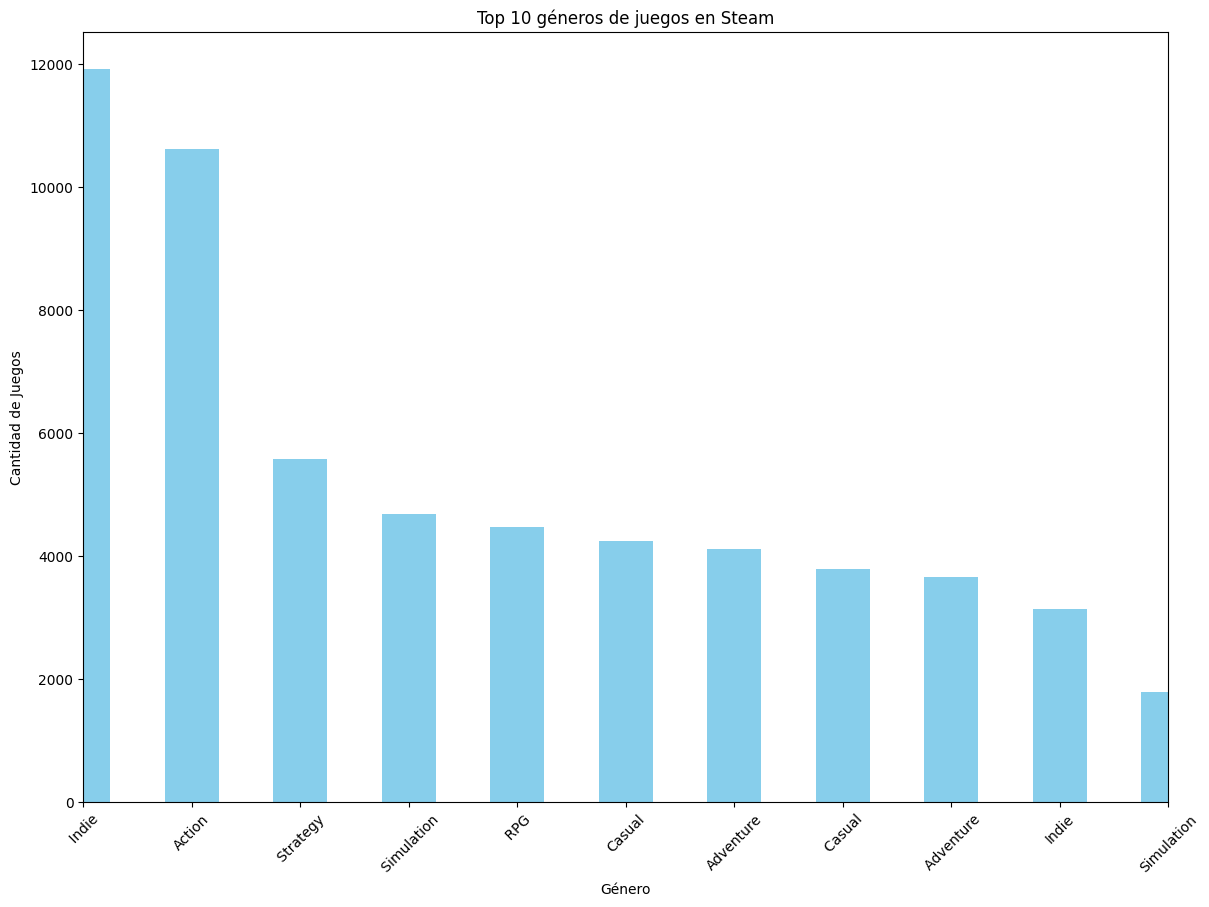

In [35]:
plt.figure(figsize=(14, 10))
all_genres = df_games['genres'].str.get_dummies(sep=',').sum().sort_values(ascending=False)
all_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 géneros de juegos en Steam')
plt.xlabel('Género')
plt.xlim(0,10)
plt.xticks(rotation=45)
plt.ylabel('Cantidad de Juegos')
plt.show()

### Cantidad de juegos por año de lanzamiento

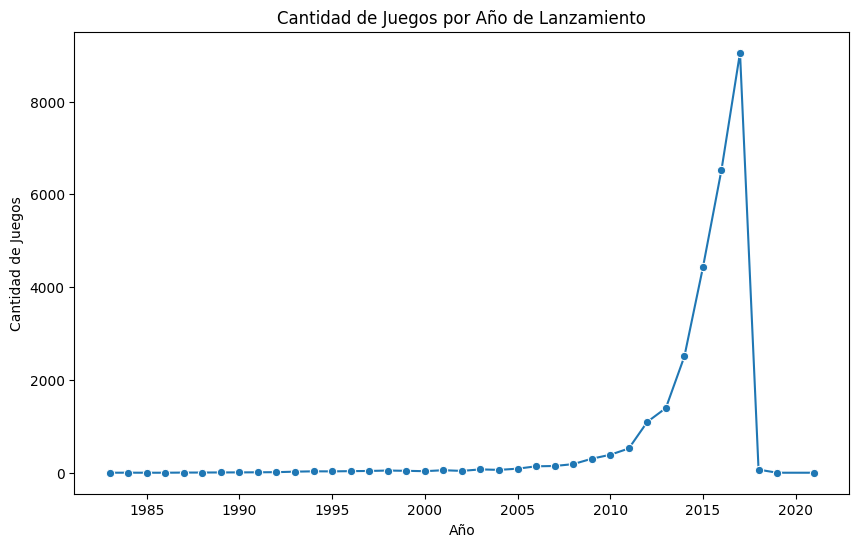

In [36]:
df_games['release_year'] = df_games['release_date'].dt.year
games_per_year = df_games['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values, marker='o')
plt.title('Cantidad de Juegos por Año de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.show()

### Reviews por sentimiento

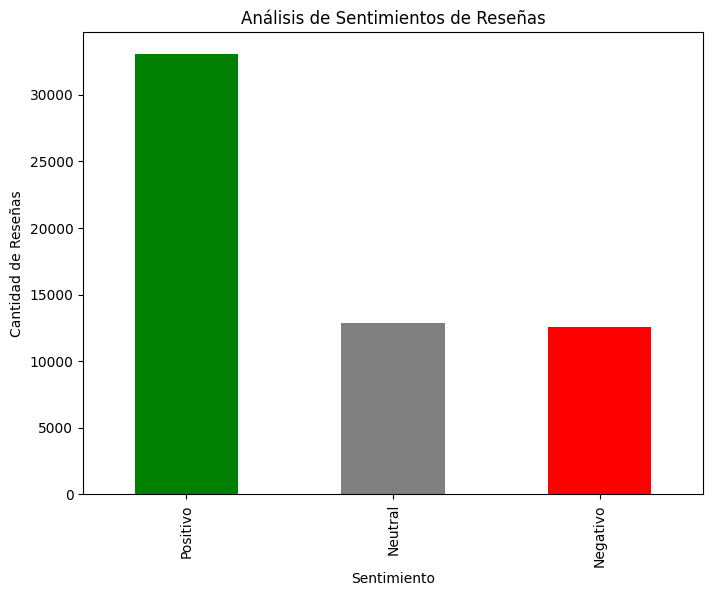

In [37]:
sentiment_counts = df_reviews['sentiment_analysis'].value_counts()
sentiment_counts.index = ['Positivo', 'Neutral', 'Negativo']
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Análisis de Sentimientos de Reseñas')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.show()

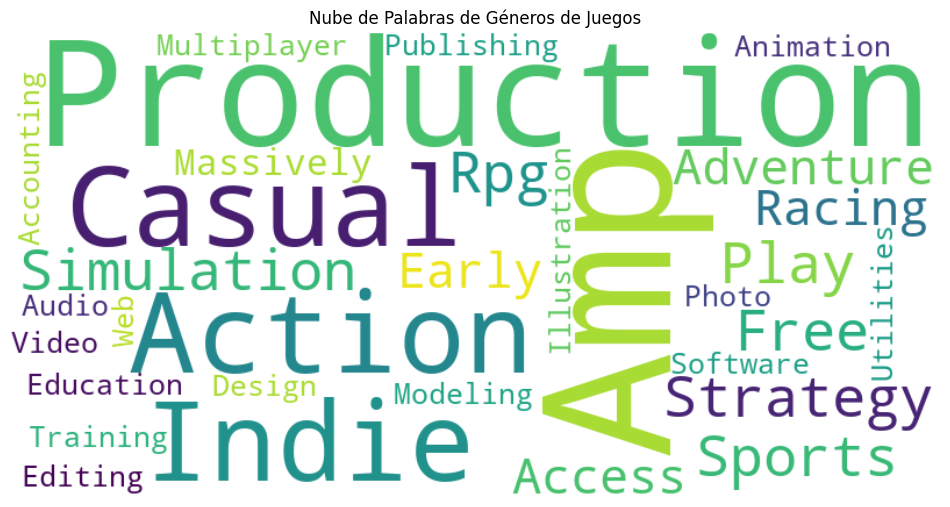

In [46]:
# Preprocesar la columna 'genres'
all_genres = df_games['genres'].dropna().str.split(',').explode()
all_genres = ' '.join(all_genres.str.strip().str.title().unique())

# Crear la nube de palabras para los géneros
wordcloud_genres = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Mostrar la nube de palabras para los géneros
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud_genres, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Géneros de Juegos')
plt.show()

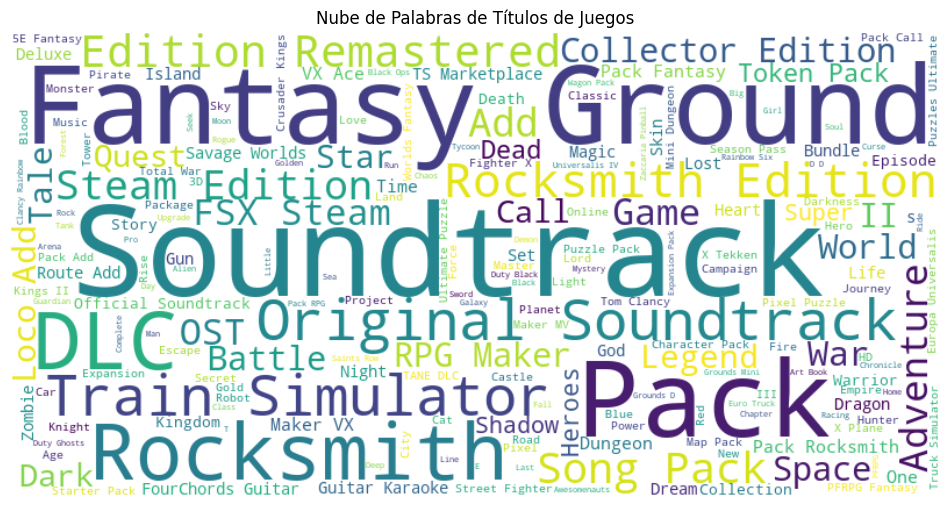

In [53]:
# Preprocesar la columna 'title'
all_titles = df_games['title'].unique()
all_titles_text = ' '.join(all_titles)

# Crear la nube de palabras para los títulos de los juegos
wordcloud_titles = WordCloud(width=800, height=400, background_color='white').generate(all_titles_text)

# Mostrar la nube de palabras para los títulos de los juegos
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos de Juegos')
plt.show()